In [2]:
### Import libraries ###
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Interpolation: 

You will often find that you have to estimate intermediate values between data
defined by points. The most common method used for this purpose is polynomial interpolation. Remember that the general formula for a polynomial of $n_{Th}$ degree is:

$$ f(x) = a_0 + a_1x + a_2x^2 + · · · + a_mx^m$$
  
Given $n + 1$ points, there is one and only one polynomial of degree $n$  that passes through all points. For example:<br>
<ul>
<li>There is only one straight line (that is, a polynomial of the $1st$ degree) connecting $2$ points.</li>
<li>Similarly, there is only a parabola (that is, a polynomial of the $2nd$ degree)  that unites a set of $3$ points. </li>
</ul>
Polynomial interpolation consists of determining the unique polynomial of $n_{Th}$ degree that fits to n + 1 points. This polynomial, then, provides a formula to calculate intermediate values. Although there is one and only one polynomial of $n_{Th}$ degree that fits to n + 1 points,
There is a great variety of mathematical ways in which this can be expressed.
polynomial.

##  1 NEWTON'S POLYNOMIAL INTERPOLATION IN DIVIDED DIFFERENCES

### 1.a Linear interpolation (2 point  Interpolation):
The simplest form of interpolation is to join two points with a straight line.
This technique, called linear interpolation:

$$ \frac{f_1(x) -f(x_0)}{x-x_0} = \frac{f(x_1) -f(x_0)}{x_1-x_0}$$

We can rearrange this as: 
$$f_1(x)  = f(x_0) + \frac{f(x_1)-f(x_0)}{x_1-x_0}(x-x_0)$$

Value: 0.358351893845611, Error: 48.30074998557687 %


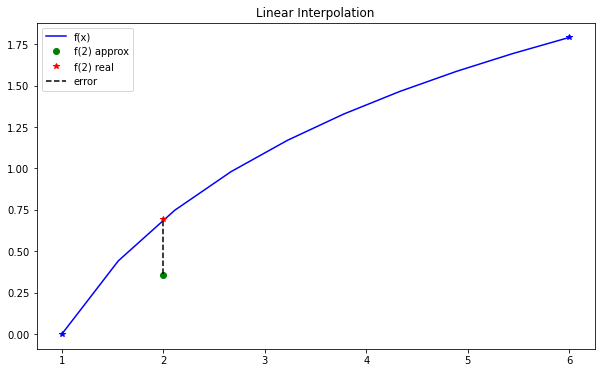

In [43]:
def lineal_interpolation(a,c,b,f_a,f_c):
    f_b = f_a + ((f_c-f_a)/(c-a))*(b-a)
    return f_b
### example ###
a=1 # first point
b=2 # Point in the middle We want to interpolate this point
c=6 # Second point 

f_a = np.log(a) # Firs point evaluation in function
f_c = np.log(c) # Second  point evaluation in function
f_b = lineal_interpolation(a,c,b,f_a,f_c) # Point in the middle  evaluation in function

x = np.linspace(1,6,10)
f = np.log(x)
error = (np.log(b) - f_b)/(np.log(b))*100
print(f"Value: {f_b}, Error: {error} %")
### Plot ###
plt.figure(figsize=(10,6))
plt.plot(x,f,"b-",label="f(x)")
plt.plot(a,f_a,"b*")
plt.plot(c,f_c,"b*")
plt.plot(b,f_b,"go",label="f(2) approx")
plt.plot(b,np.log(b),"r*",label="f(2) real")
plt.axvline(x=2,ymin=0.23,ymax=0.4,linestyle='--',color="black", label="error")

### Make Plot Pretty ###
plt.title("Linear Interpolation")
plt.legend()
plt.show()

### 1.b Quadratic interpolation (3 point Interpolation):

A strategy to improve the estimation consists of introducing some curvature to the line that joins the points. If you have three points as data,
These can be fitted into a second degree polynomial (also known as a quadratic polynomial or parabola). A particularly convenient way for this is:

$$ f_2(x) = b_0 + b_1(x – x_0) + b_2(x – x_0)(x – x_1)  $$

Open multiplications: 

$$ f_2(x) = b_0 + b_1x – b_1x_0 + b_2x_2 + b_2x_0x_1 – b_2xx_0 – b_2xx_1 $$

We can grup terms:
 $$ f_2(x) = a_0 + a_1x + a_2x_2 $$

Where:

$a_0 = b_0 – b_lx_0 + b_2x_0x_1$

$a_1 = b_1 – b_2x_0 – b_2x_1 $ 

$a_2 = b_2$

We can define:

$$ b_0 = f(x_0) $$

$$ b_1 =\frac{f(x_1)– f(x_0)}{x_1 - x_0}  =  \frac{f(x_1) – b_0}{x_1 - x_0}$$

$$ b_2 =\frac{\frac{f(x_2)– f(x_1)}{x_2 - x_1} - \frac{f(x_1)– f(x_0)}{x_1 - x_0}}{x_2-x_0} =  \frac{\frac{f(x_2)– f(x_1)}{x_2 - x_1} - b1}{x_2-x_0} $$

In [115]:
def quadratic_interpolation(x0,x1,x2,x,f_x0,f_x1,f_x2):
    ### Calcualte coefficents ###
    b0 = f_x0
    b1 = (f_x1 - f_x0)/(x1- x0)
    b2 = ((f_x2 - f_x1)/(x2 - x1)  - (f_x1 - f_x0)/(x1 - x0))/(x2 - x0)
    
    ### Formula ###
    f_x = b0 + b1*(x-x0) + b2*(x-x0)*(x-x1)

    return f_x

x0=1 # First point
x=2 # Point in the middle We want to interpolate this point
x1=4 # Second point
x2=6 # Third point

f_x0 = np.log(x0) # Firs    point evaluation in function
f_x1 = np.log(x1) # Second  point evaluation in function
f_x2 = np.log(x2) # Third   point evaluation in function
f_x = quadratic_interpolation(x0,x1,x2,x,f_x0,f_x1,f_x2) # Point in the middle  evaluation in function

### GET Error ###
error = (np.log(b) - f_x)/(np.log(b))*100
print(f"Value: {f_x}, Error: {error} %")

Value: 0.5658443469009827, Error: 18.36591668108979 %


### 1.c Cubic  interpolation (4 point Interpolation):
In other to see the pattern of Newton's Polynomials lets do a 3rd order interpolation (4 point interpolation):

$$ f_3(x) = b_0 + b_1(x – x_0) + b_2(x – x_0)(x – x_1)  + b_3(x – x_0)(x – x_1)(x-x_2)$$

with:
$$ b_0 = f(x_0) $$

<br> 

$$ b_1 =\frac{f(x_1)– f(x_0)}{x_1 - x_0}  =  \frac{f(x_1) – b_0}{x_1 - x_0}$$

<br> 

$$ b_2 =\frac{\frac{f(x_2)– f(x_1)}{x_2 - x_1} - \frac{f(x_1)– f(x_0)}{x_1 - x_0}}{x_2-x_0}  =  \frac{\frac{f(x_2)– f(x_1)}{x_2 - x_1} - b1}{x_2-x_0} $$

<br> 

$$ b3 = \frac{\frac{\frac{f(x_3)– f(x_2)}{x_3 - x_2}  - \frac{f(x_2)– f(x_1)}{x_2 - x_1}}{x_3-x_1} - \frac{\frac{f(x_2)– f(x_1)}{x_2 - x_1} - \frac{f(x_1)– f(x_0)}{x_1 - x_0}}{x_2-x_0}}{x_3-x_0} =  \frac{\frac{\frac{f(x_3)– f(x_2)}{x_3 - x_2}  - \frac{f(x_2)– f(x_1)}{x_2 - x_1}}{x_3-x_1} - b2}{x_3-x_0}$$

In [6]:
def cubic_interpolation(x0,x1,x2,x3,x,f_x0,f_x1,f_x2,f_x3):
    
    ### Calcualte coefficents ###
    
    # 0th coefficient
    b0 =f_x0 
    
    # 1st coefficient
    b1 = (f_x1 - b0)/(x1- x0)
    
    # 2nd coefficient
    b2 = ((f_x2 - f_x1)/(x2 - x1) - b1)/(x2-x0)
    
    # 3rd coefficient
    b3 =( ( (f_x3 - f_x2)/(x3 - x2) - (f_x2 - f_x1)/(x2 - x1) )/(x3-x1)  - b2 )/(x3-x0)
    
    ### Formula ###
    f_x = b0 +  b1*(x-x0) + b2*(x-x0)*(x-x1) + b3*(x-x0)*(x-x1)*(x-x2)

    return f_x

x0 =1 # First point
x  =2 # Point in the middle We want to interpolate this point
x1 =4 # Second point
x2 =6 # Third point
x3 =5 # Forth point

f_x0 = np.log(x0) # First    point evaluation in function
f_x1 = np.log(x1) # Second  point evaluation in function
f_x2 = np.log(x2) # Third   point evaluation in function
f_x3 = np.log(x3) # Forth  point evaluation in function
f_x = cubic_interpolation(x0,x1,x2,x3,x,f_x0,f_x1,f_x2,f_x3) # Point in the middle  evaluation in function

### GET Error ###
error = (np.log(x) - f_x)/(np.log(x))*100
print(f"Value: {f_x}, Error: {error} %")

Value: 0.6287685789084135, Error: 9.28786893420309 %


### 1.c Lagrange Interpolation:
The Lagrange interpolation polynomial is simply a reformulation of Newton's polynomial that avoids the computation of divided differences, and is represented by:

$$ f_n(x) = \sum_{i=0}^{n} L_i(x)f(x_i) $$

where:


$$ L_i(x) = \prod_{j=0,j \neq i}^{n} \frac{x-x_j}{x_i-x_j} $$

**Example:**

n=1 (2 point interpolation):

$$ f_1(x) = \frac{x-x_1}{x_0-x_1}f(x_0) +\frac{x-x_0}{x_1-x_0}f(x_1) $$

n=2 (3point interpolation):

$$ f_2(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1)  + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)$$

In [51]:
def lagrannge_interpolation(xp,fp,n,x):
    """ Lagrange interpolation, input:
        xp = a vector of points
        fp = a vector of points 
        n  = Degree of interpolation
        x  = point to evaluate"""
    suma = 0 # init sum
    
    for i in range(0,n+1): # iterate over the order +1 (to have n too)
        producto = fp[i]   # Get the y axis value
        for j in range(0,n+1):  # iterate over the order +1 (to have n too)
            if i != j :
                producto = producto*(x - xp[j])/(xp[i] - xp[j]) #yi*L
            
        suma = suma + producto  # add every iteration of i
    return suma


### Example ###
xp = [1,4,6,7]
x  = 2
fp = [np.log(1),np.log(4),np.log(6),np.log(7)]
n = 3
### make 3 evaluations ###
for ni in range(1,n+1):
    f_x = lagrannge_interpolation(xp,fp,ni,x)

    ### GET Error ###
    error = (np.log(x) - f_x)/(np.log(x))*100
    print(f"Number of points: {ni+1}, Degree of polynomial: {ni}, Value: {f_x}, Error: {error} %\n")

Number of points: 2, Degree of polynomial: 1, Value: 0.46209812037329684, Error: 33.333333333333336 %

Number of points: 3, Degree of polynomial: 2, Value: 0.5658443469009826, Error: 18.365916681089807 %

Number of points: 4, Degree of polynomial: 3, Value: 0.6134165538186294, Error: 11.502697980666547 %



In [42]:
# This is just to visualize the algorithm ##
n=2
suma = 0
for i in range(0,n+1):
    print(f"y{i}")
    for j in range(0,n+1):
        if i != j :
            print(f"x-x{j}/x{i}-x{j}")
    
    


y0
x-x1/x0-x1
x-x2/x0-x2
y1
x-x0/x1-x0
x-x2/x1-x2
y2
x-x0/x2-x0
x-x1/x2-x1
